In [1]:
import pandas as pd


In [2]:
import quandl
# set api key
quandl.ApiConfig.api_key = "sY8rR9LTz4kT5z2cs94v"

In [3]:
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2018-01-01')

In [4]:
# Grabbing a bunch of tech stocks for our portfolio
tcs = quandl.get('NSE/TCS.5',start_date=start_date,end_date=end_date)
infy = quandl.get('NSE/INFY.5',start_date=start_date,end_date=end_date)
kpit = quandl.get('NSE/KPIT.5',start_date=start_date,end_date=end_date)
techm = quandl.get('NSE/TECHM.5',start_date=start_date,end_date=end_date)


ConnectionError: HTTPSConnectionPool(host='www.quandl.com', port=443): Max retries exceeded with url: /api/v3/datasets/NSE/TCS/data?order=asc&start_date=2013-01-01+00%3A00%3A00&end_date=2018-01-01+00%3A00%3A00&column_index=5 (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x00000231A41EA710>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [15]:
for stock in (tcs,infy,kpit,techm):
    stock['Normalized Return'] = stock['Close']/stock.iloc[0]['Close']

## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 40% in TCS
* 20% in INFOSYS
* 30% in TECH Mahindra
* 10% in KPIT


In [18]:
for stock, alloc in zip((tcs,infy,kpit,techm),[.4,.2,.1,.3]):
    stock['Allocation'] = stock['Normalized Return']*alloc

In [19]:
techm.head()

,Close,Normalized Return,Allocation
Date,,,
2013-01-01,933.65,1.000000,0.300000
2013-01-02,939.70,1.006480,0.301944
2013-01-03,941.35,1.008247,0.302474
2013-01-04,942.50,1.009479,0.302844
2013-01-07,927.05,0.992931,0.297879


Lets say we invested INR 1,00,000

In [20]:
for stock in (tcs,infy,kpit,techm):
    stock['Position'] = stock['Allocation']*100000

In [21]:
kpit.head()

,Close,Normalized Return,Allocation,Position
Date,,,,
2013-01-01,109.70,1.000000,0.100000,10000.000000
2013-01-02,109.15,0.994986,0.099499,9949.863263
2013-01-03,108.05,0.984959,0.098496,9849.589790
2013-01-04,110.85,1.010483,0.101048,10104.831358
2013-01-07,109.45,0.997721,0.099772,9977.210574


Lets calculate the total portfolio value now

In [25]:
all_pos_vals = [tcs['Position'],infy['Position'],kpit['Position'],techm['Position']]
portfolio_val = pd.concat(all_pos_vals,axis=1)
portfolio_val.columns = ['TCS Position','Infy Position','KPIT Position','Tech Mahindra Position']

In [26]:
portfolio_val.head()

,TCS Position,Infy Position,KPIT Position,Tech Mahindra Position
Date,,,,
2013-01-01,40000.000000,20000.000000,10000.000000,30000.000000
2013-01-02,39973.104458,20003.031812,9949.863263,30194.398329
2013-01-03,40520.507851,20251.640427,9849.589790,30247.416055
2013-01-04,41109.045604,20352.556468,10104.831358,30284.367804
2013-01-07,40971.403710,20571.280074,9977.210574,29787.929095


In [27]:
portfolio_val['Total Position'] = portfolio_val.sum(axis=1)

In [29]:
portfolio_val.tail()

,TCS Position,Infy Position,KPIT Position,Tech Mahindra Position,Total Position
Date,,,,,
2017-12-26,83833.405846,8970.699699,15578.851413,15853.906710,124236.863668
2017-12-27,82898.390223,8959.005566,15683.682771,16162.373480,123703.452040
2017-12-28,83121.465016,8950.343244,15811.303555,15971.188347,123854.300162
2017-12-29,85470.869754,9026.571670,16476.754786,16196.112033,127170.308243
2018-01-01,83711.584859,8952.941941,16841.385597,16165.586676,125671.499073


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

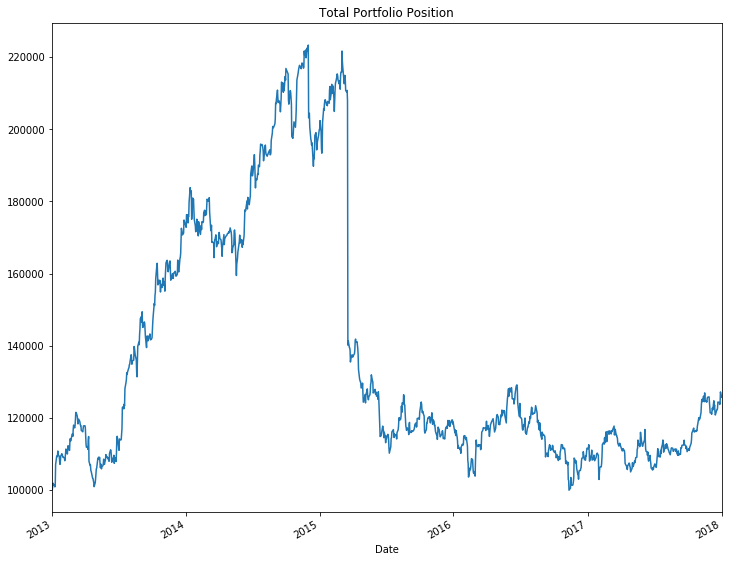

In [31]:
portfolio_val['Total Position'].plot(figsize=(12,10),title='Total Portfolio Position')


That is not good at all. Lets calculate some portfolio stats and optimize the returns using Sharpe Ratio

In [32]:
portfolio_val['Daily Return'] = portfolio_val['Total Position'].pct_change(1)


In [33]:
portfolio_val.head()

,TCS Position,Infy Position,KPIT Position,Tech Mahindra Position,Total Position,Daily Return
Date,,,,,,
2013-01-01,40000.000000,20000.000000,10000.000000,30000.000000,100000.000000,NaN
2013-01-02,39973.104458,20003.031812,9949.863263,30194.398329,100120.397862,0.001204
2013-01-03,40520.507851,20251.640427,9849.589790,30247.416055,100869.154124,0.007479
2013-01-04,41109.045604,20352.556468,10104.831358,30284.367804,101850.801233,0.009732
2013-01-07,40971.403710,20571.280074,9977.210574,29787.929095,101307.823454,-0.005331


In [34]:
portfolio_val['Daily Return'].mean()

0.00031941432347045226

In [37]:
portfolio_val['Daily Return'].std()

0.015623905110228424

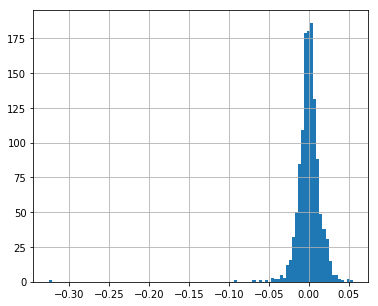

In [45]:
portfolio_val['Daily Return'].hist(bins=100,figsize=(6,5))

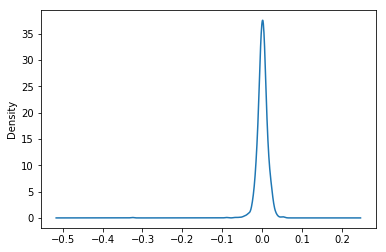

In [46]:
portfolio_val['Daily Return'].plot(kind='kde')

In [47]:
cum_return = 100*(portfolio_val['Total Position'][-1]/portfolio_val['Total Position'][0] - 1)

In [48]:
cum_return

25.671499073216907

### Sharpe Ratio time

In [54]:
rf_return_ind = 0.0756


In [55]:
sharpe_ratio = (portfolio_val['Daily Return'].mean() - rf_return_ind)/portfolio_val['Daily Return'].std()

In [56]:
sharpe_ratio

-4.818295115428343

In [57]:
asr = (252**0.5)*sharpe_ratio

In [58]:
asr

-76.48806371244392